In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/terrain-dataset/terrain dataset/New Text Document.txt
/kaggle/input/terrain-dataset/terrain dataset/pyg.py
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (202).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (152).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (399).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (438).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (92).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (263).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (443).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (422).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (11).jpg
/kaggle/input/terrain-dataset/terrain dataset/Sandy_Terrain/sandy_terrain (389).jpg
/kaggle/input/terrain-dataset/terrain dat

In [2]:
import tensorflow
from tensorflow import keras
from keras.layers import Flatten, Dense, Input, Dropout, Add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Model
from keras.regularizers import l2

2024-04-25 09:36:19.742241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 09:36:19.742331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 09:36:19.836571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, zoom_range=[0.8, 1.2],
                             horizontal_flip=True,vertical_flip=True, validation_split=0.2)

In [4]:
path = "/kaggle/input/terrain-dataset/terrain dataset"

In [5]:
train_data = datagen.flow_from_directory(path, subset='training', target_size=(229,229), shuffle=True)
val_data = datagen.flow_from_directory(path, subset='validation', target_size=(229,229), shuffle=True )

Found 1592 images belonging to 5 classes.
Found 397 images belonging to 5 classes.


In [6]:
from keras.applications.xception import Xception
input = Input(shape=(229,229,3))
model = Xception(include_top=False, input_tensor=input)
model.trainable=True

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
output = model.output
x = Flatten()(output)
x = Dense(units = 256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units = 125, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units = 5, activation='softmax')(x)
final_model = Model(inputs=input, outputs=x)

In [8]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/kaggle/working/best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

In [9]:
final_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [10]:
history = final_model.fit(train_data, epochs=20, batch_size=32, validation_data=val_data, callbacks=callbacks)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714037946.415671     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714037946.490942     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4217 - loss: 1.4049

W0000 00:00:1714038033.093146     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.88665, saving model to /kaggle/working/best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4249 - loss: 1.3983 - val_accuracy: 0.8866 - val_loss: 0.3577
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.8452 - loss: 0.4716
Epoch 2: val_accuracy improved from 0.88665 to 0.93703, saving model to /kaggle/working/best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 795ms/step - accuracy: 0.8456 - loss: 0.4708 - val_accuracy: 0.9370 - val_loss: 0.2218
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.8912 - loss: 0.3232
Epoch 3: val_accuracy improved from 0.93703 to 0.94962, saving model to /kaggle/working/best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 777ms/step - accuracy: 0.8914 - loss: 0.3228 - val_accuracy: 0.9496 - val_loss: 0.1774
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.9045 - loss: 0.2693
Epoch 4: val_accuracy improved from 0.94962 to 0.96222, saving model to /kagg

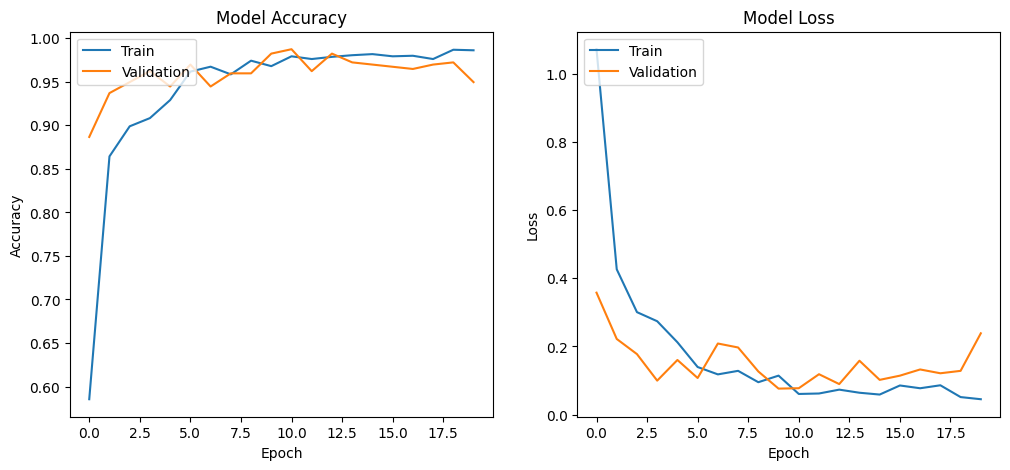

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [14]:
from IPython.display import FileLink

# Replace 'my_model.keras' with the name of your model file
FileLink(r'/kaggle/working/best_model.keras')


/kaggle/working/best_model.keras